<a href="https://colab.research.google.com/github/Kanch-prog/google_search_analysis_in_python/blob/main/search_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Analysis of google search in the python.
!pip install pytrends

In [2]:
!pip install pandas matplotlib seaborn


Interest Over Time:
            python  isPartial
date                         
2023-05-21      79      False
2023-05-28      74      False
2023-06-04      76      False
2023-06-11      77      False
2023-06-18      73      False
2023-06-25      79      False
2023-07-02      69      False
2023-07-09      90      False
2023-07-16      85      False
2023-07-23      81      False


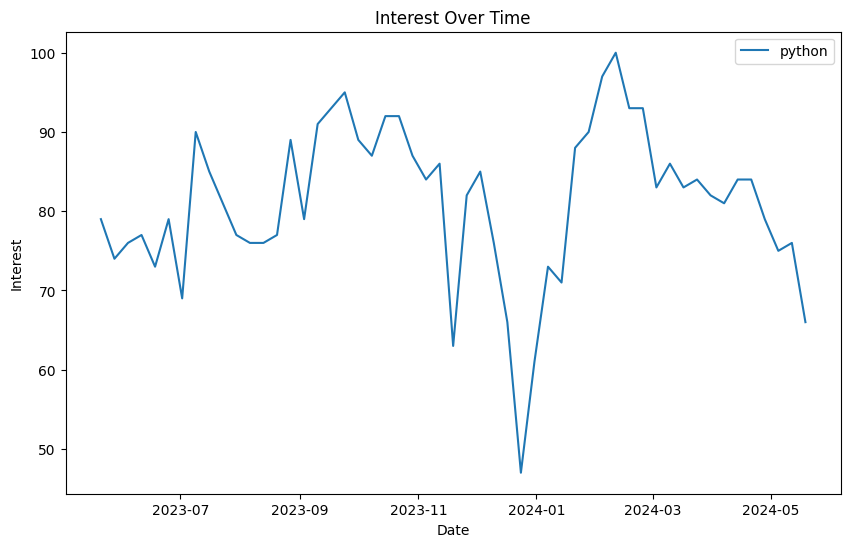

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import pandas as pd

# initialize pytrend
pytrends = TrendReq(hl='en-US', tz=360)
# build payload
kw_list= ["python"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='US', gprop='')
# get data for interest over time
interest_over_time_df = pytrends.interest_over_time()
print("Interest Over Time:")
print(interest_over_time_df.head(10))


# Plot Interest Over Time
plt.figure(figsize=(10, 6))
plt.plot(interest_over_time_df.index, interest_over_time_df[kw_list[0]], label=kw_list[0])
plt.title('Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.show()

Interest By Region:
                      python
geoName                     
Alabama                   32
Alaska                    26
Arizona                   41
Arkansas                  30
California                85
Colorado                  72
Connecticut               51
Delaware                  34
District of Columbia     100
Florida                   32


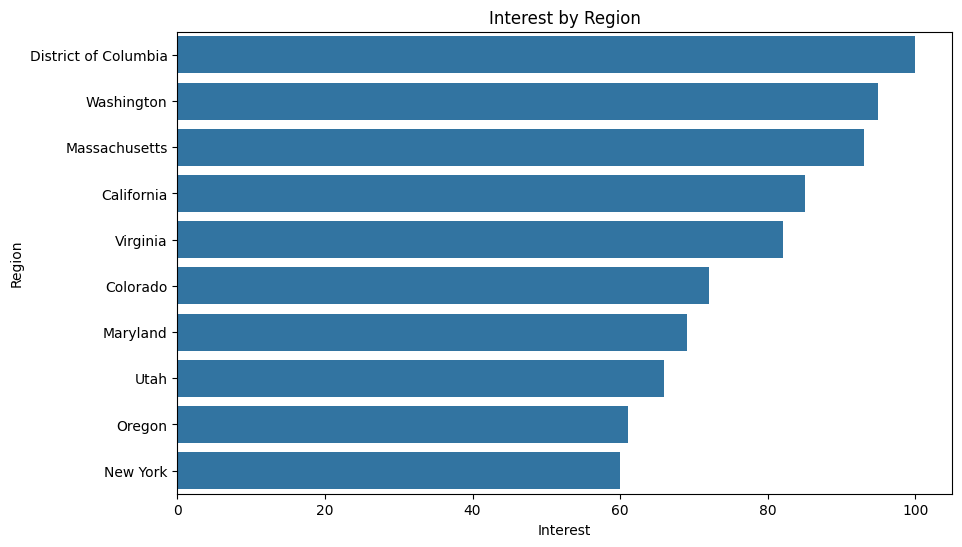

TooManyRequestsError: The request failed: Google returned a response with code 429

In [4]:
# interest by regions
interest_by_region_df = pytrends.interest_by_region(resolution='COUNTRY')
print("Interest By Region:")
print(interest_by_region_df.head(10))

# Plot Interest by Region (Top 10 Regions)
top_regions = interest_by_region_df[kw_list[0]].sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Interest by Region')
plt.xlabel('Interest')
plt.ylabel('Region')
plt.show()

# related queries
related_queries_dict = pytrends.related_queries()
print("Related Queries:")
print(related_queries_dict)

# Convert Related Queries to DataFrame
related_queries_df = related_queries_dict[kw_list[0]]['top']
if related_queries_df is not None:
    print(related_queries_df.head())

    # Plot Top Related Queries
    plt.figure(figsize=(10, 6))
    sns.barplot(x=related_queries_df['value'].head(10), y=related_queries_df['query'].head(10))
    plt.title('Top Related Queries')
    plt.xlabel('Value')
    plt.ylabel('Query')
    plt.show()

# Keyword Suggestions
suggestions_dict = pytrends.suggestions(keyword='Python')
print("\nKeyword Suggestions:")
print(suggestions_dict)

# Convert Suggestions to DataFrame
suggestions_df = pd.DataFrame(suggestions_dict)
print(suggestions_df.head())